# Node Classification

Given the embedding of a node, decide whether g-railway passes this station.

We will use logistic regression to make classification.

In [1]:
import pandas as pd
import networkx as nx
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Node split

Split nodes to train nodes and test nodes with proportion 8:2.

In [2]:
whole_graph = nx.read_edgelist('../graph/whole_undirected_graph.g')
nodes = list(whole_graph.nodes)

In [3]:
random.seed(1234)
random.shuffle(nodes)

In [4]:
train_size, test_size = 2260, 566
train_nodes = nodes[:train_size]
test_nodes = nodes[train_size:]

## Build Dataset 

In [5]:
embedding_path = '../embedding/embedding/'
walk_methods = ['prob_walk_stratified_graph_','prob_walk_whole_graph_',\
               'random_walk_whole_graph_']
dim_space = ['8','16','32','64','128']

In [6]:
graph = nx.read_edgelist('../graph/g_undirected_graph.g')
g_nodes = list(graph.nodes)

In [7]:
def find_thresold(prob,label):
    thre_list = [i for i in range(1,100)]
    acc = [np.sum((prob<thre/100).astype(int) == label) for thre in thre_list]
    return thre_list[acc.index(max(acc))]/100   

In [8]:
def NodeClassification(walk_method,dim):
    data = pd.read_csv(embedding_path+walk_method+dim+'.csv',index_col=0)
    label = list(pd.Series(data.index).apply(lambda x:1 if x in g_nodes else 0))
    data['label'] = label
    
    train_data = data.loc[train_nodes]
    test_data = data.loc[test_nodes]
    
    train_X = train_data.iloc[:,:-1].values
    train_Y = train_data['label'].values
    test_X = test_data.iloc[:,:-1].values
    test_Y = test_data['label'].values
    
    clf = LogisticRegression(penalty='none')
    clf.fit(train_X,train_Y)
    prob = clf.predict_proba(train_X)[:,0]
    threshold = find_thresold(prob,train_Y)
    
    prob_test = clf.predict_proba(test_X)[:,0]
    acc = np.sum((prob_test<threshold).astype(int) == test_Y)/len(test_Y)
    
    print('walk:',walk_method[:-1],',dim:',dim,\
          ',thre',threshold,',acc:',round(acc,4))

In [9]:
for walk_method in walk_methods:
    for dim in dim_space:
        NodeClassification(walk_method,dim)

walk: prob_walk_stratified_graph ,dim: 8 ,thre 0.46 ,acc: 0.7739
walk: prob_walk_stratified_graph ,dim: 16 ,thre 0.43 ,acc: 0.7739
walk: prob_walk_stratified_graph ,dim: 32 ,thre 0.41 ,acc: 0.7756
walk: prob_walk_stratified_graph ,dim: 64 ,thre 0.51 ,acc: 0.7862
walk: prob_walk_stratified_graph ,dim: 128 ,thre 0.53 ,acc: 0.7739
walk: prob_walk_whole_graph ,dim: 8 ,thre 0.47 ,acc: 0.8074
walk: prob_walk_whole_graph ,dim: 16 ,thre 0.47 ,acc: 0.8322
walk: prob_walk_whole_graph ,dim: 32 ,thre 0.46 ,acc: 0.8463
walk: prob_walk_whole_graph ,dim: 64 ,thre 0.48 ,acc: 0.9099
walk: prob_walk_whole_graph ,dim: 128 ,thre 0.54 ,acc: 0.9276
walk: random_walk_whole_graph ,dim: 8 ,thre 0.51 ,acc: 0.8021
walk: random_walk_whole_graph ,dim: 16 ,thre 0.44 ,acc: 0.7951
walk: random_walk_whole_graph ,dim: 32 ,thre 0.51 ,acc: 0.8339
walk: random_walk_whole_graph ,dim: 64 ,thre 0.52 ,acc: 0.8852
walk: random_walk_whole_graph ,dim: 128 ,thre 0.54 ,acc: 0.924


In [10]:
prob_walk = [0.8074, 0.8322, 0.8463, 0.9099, 0.9276]
rand_walk = [0.8021, 0.7951, 0.8339, 0.8852, 0.924]
xlim = ['3','4','5','6','7']

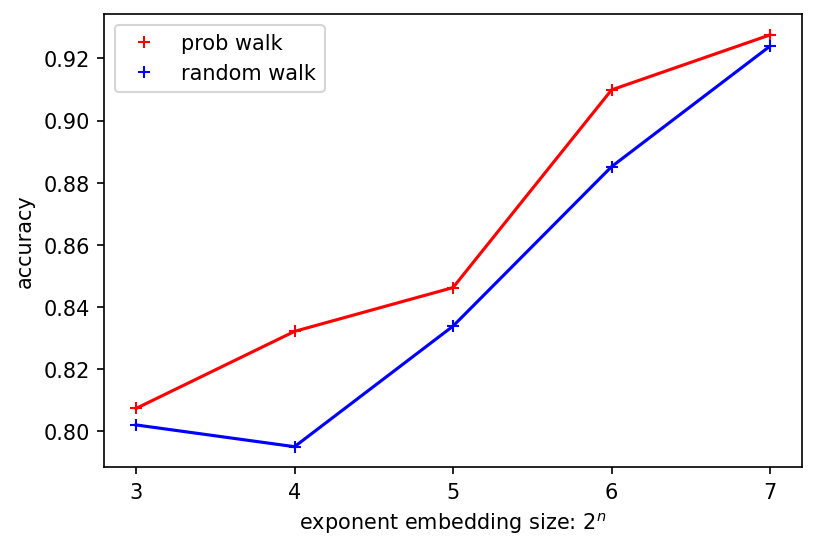

In [11]:
plt.figure(dpi=150)
plt.plot(xlim,prob_walk,'r+')
plt.plot(xlim,rand_walk,'b+')
plt.plot(xlim,prob_walk,'r')
plt.plot(xlim,rand_walk,'b')
plt.legend(['prob walk','random walk'])
plt.xlabel('exponent embedding size: $2^n$')
plt.ylabel('accuracy')
plt.savefig('fig/node_classification.png')